In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from IPython.display import HTML, display
from scipy.stats import expon, kde, kstest, gamma
from numpy import inf,linspace

In [11]:
data_path2 = "C:/Users/Anusha/Documents/Copied on 9_26_19/Fall 2019/Data Science/Project/GoogleMeet.csv"
meetingminutes = pd.read_csv(data_path2)
meetingminutes['time'] = pd.to_datetime(meetingminutes['time'],utc=True)
meetingminutes.set_index('time', inplace=True)
alm = meetingminutes['average_meeting_minutes']

Text(0.5, 0, 'Year')

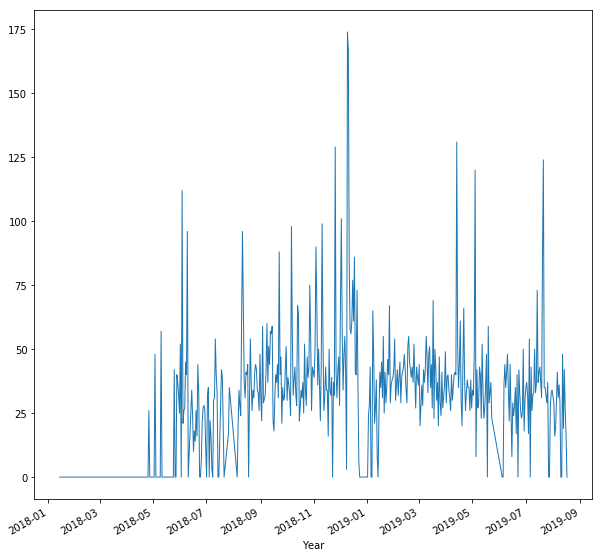

In [12]:
alm.plot(figsize=(10,10), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10)

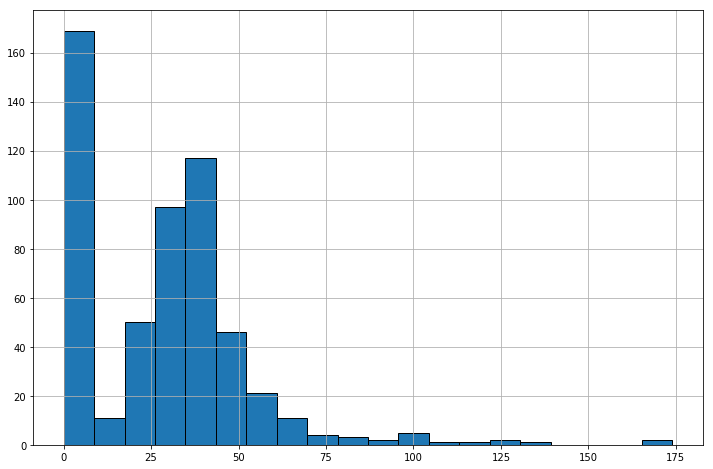

In [13]:
alm.hist(bins=20, ec='black', figsize=(12,8))

In [14]:
alm.var()

621.4663377572998

Kernel Density Estimation - KDE

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


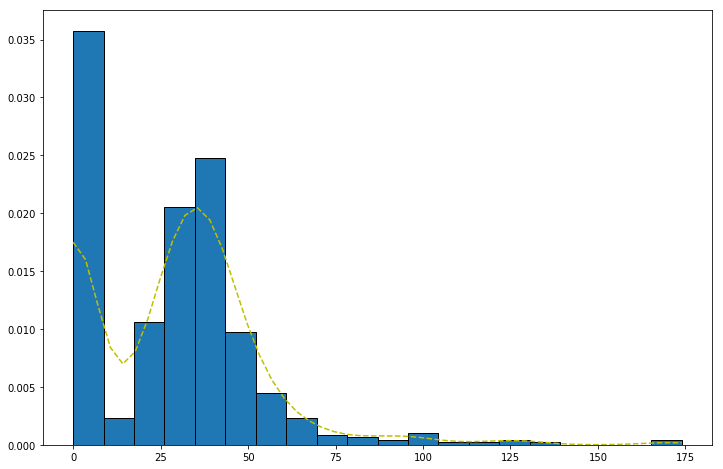

In [15]:
from scipy.stats import kde
alm.hist(normed=True, bins=20, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, alm.max())
density = kde.gaussian_kde(alm, bw_method=None)
xgrid = np.linspace(x.min(), x.max(), 100)

plt.plot(x, density(x), 'y--')

It follows gamma distribution

In [16]:
cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])

In [17]:
kstest(alm,cdf)

KstestResult(statistic=0.1523425384131459, pvalue=1.8111734334524954e-11)